#Tarea 2: **Interpretación de base de datos: Análisis de peligrosidad se los ciclones tropicales en México. Evaluación con el Sistema de Alerta Temprana para Ciclones Tropicales (SIAT-CT)** 🌩

**Equipo:**


*  Benítez López Lidia Yoletzi
*  Gómez Soto Montserrat


> Utilizando la base de datos modificada de Pérez-Estrada et al. (2024) [10.1016/j.dib.2024.111179], se busca evaluar su impacto a través del Sistema de Alerta Temprana para Ciclones Tropicales (SIAT-CT) y generar funciones que permitan calcular la peligrosidad de futuros ciclones.


## 1. Exploración de datos

*  1.1 Análisis visual del ciclo de vida del ciclón considerando variables clave: viento, presión y tamaño.
*  1.2 Descripción de la variación del ciclón en función de los radios de precipitación



In [ ]:
#Instalación librería

#Importando librerías
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd

Funciones para el código

In [ ]:
#Apertura de base de datos
from google.colab import files
archivo = files.upload()

Saving alex_data.csv to alex_data.csv


In [ ]:
df = pd.read_csv('alex_data.csv')  #los datos del .csv
df

,day,month,year,hour,lat,lon,mws,cpsl,r34,r5,rne,rnw,rsw,rse,rp
0,24,6,2010,18,15.9,-82.0,46.25,1007,-9999.0,639.5,805.22,983.47,521.18,725.81,758.9
1,25,6,2010,0,16.0,-82.1,46.25,1006,-9999.0,640.5,1105.73,1319.65,594.94,1313.03,1083.3
2,25,6,2010,6,16.1,-82.3,46.25,1006,-9999.0,641.0,732.55,888.67,762.36,685.23,767.2
3,25,6,2010,12,16.2,-82.5,55.50,1005,-9999.0,683.5,766.59,773.32,869.44,698.78,777.0
4,25,6,2010,18,16.4,-83.1,55.50,1005,-9999.0,685.0,791.56,1175.57,696.02,1187.78,962.7
5,26,6,2010,0,16.6,-83.9,55.50,1004,-9999.0,686.5,915.64,1173.62,787.36,1155.50,1008.0
6,26,6,2010,6,16.7,-84.9,74.00,1004,84.0,742.0,870.62,782.71,874.05,788.46,829.0
7,26,6,2010,12,16.9,-86.1,74.00,1004,84.5,743.5,837.12,775.85,1065.62,848.04,881.7
8,26,6,2010,18,17.2,-87.2,101.70,996,154.0,785.5,818.72,883.76,1005.71,955.63,916.0
9,27,6,2010,0,17.5,-88.2,101.70,995,154.5,788.0,828.32,1035.44,1046.97,949.56,965.1


In [ ]:
df = pd.read_csv('alex_data.csv')
#Concatenar fecha
df['datetime'] = pd.to_datetime(df['year'].astype(str) + '-' +
                                  df['month'].astype(str) + '-' +
                                  df['day'].astype(str) + ' ' +
                                  df['hour'].astype(str))
#drop() función que elimina filas o columnas de un dataframe
# Filtrar las columnas para visualizar una sola de datetime
df = df.drop(['year', 'month', 'day', 'hour'], axis=1) #Reemplazamos columnas 'year','month','day'y'hour' por 'datetime'
#Ordenar las columnas, primero datetime y luego las restantes
df = df[['datetime'] + [col for col in df.columns if col != 'datetime']]

# Mostrar datatframe
df

,datetime,lat,lon,mws,cpsl,r34,r5,rne,rnw,rsw,rse,rp
0,2010-06-24 18:00:00,15.9,-82.0,46.25,1007,-9999.0,639.5,805.22,983.47,521.18,725.81,758.9
1,2010-06-25 00:00:00,16.0,-82.1,46.25,1006,-9999.0,640.5,1105.73,1319.65,594.94,1313.03,1083.3
2,2010-06-25 06:00:00,16.1,-82.3,46.25,1006,-9999.0,641.0,732.55,888.67,762.36,685.23,767.2
3,2010-06-25 12:00:00,16.2,-82.5,55.50,1005,-9999.0,683.5,766.59,773.32,869.44,698.78,777.0
4,2010-06-25 18:00:00,16.4,-83.1,55.50,1005,-9999.0,685.0,791.56,1175.57,696.02,1187.78,962.7
5,2010-06-26 00:00:00,16.6,-83.9,55.50,1004,-9999.0,686.5,915.64,1173.62,787.36,1155.50,1008.0
6,2010-06-26 06:00:00,16.7,-84.9,74.00,1004,84.0,742.0,870.62,782.71,874.05,788.46,829.0
7,2010-06-26 12:00:00,16.9,-86.1,74.00,1004,84.5,743.5,837.12,775.85,1065.62,848.04,881.7
8,2010-06-26 18:00:00,17.2,-87.2,101.70,996,154.0,785.5,818.72,883.76,1005.71,955.63,916.0
9,2010-06-27 00:00:00,17.5,-88.2,101.70,995,154.5,788.0,828.32,1035.44,1046.97,949.56,965.1


**1.1**. Análisis visual del ciclo de vida del ciclón considerando variables clave: viento, presión y tamaño

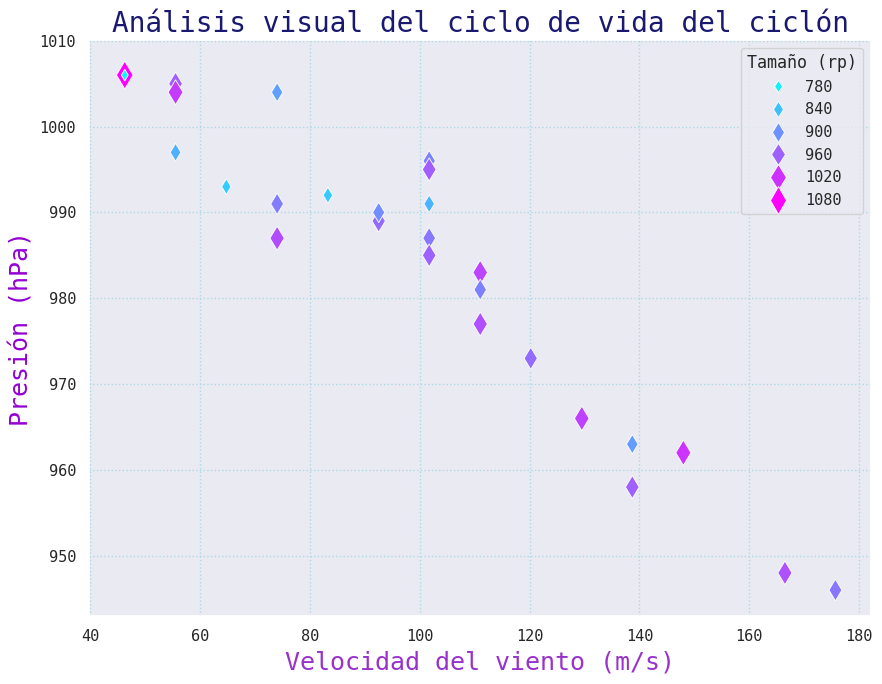

In [ ]:
#Estilo de Seaborn
sns.set_theme(style='darkgrid', font='monospace')

brou = df #database renomnbrada

plt.figure(figsize=(9, 7))  # Tamaño de la figura
sns.scatterplot(x="mws", y="cpsl", data=brou, size="rp", hue="rp", palette="cool", marker='d', sizes=(30, 200)) #tomando en cuenta rp
plt.grid(color="lightblue", linestyle="dotted", linewidth=1) #cuadriculado sea de puntos
plt.title('Análisis visual del ciclo de vida del ciclón', fontsize=20, color="midnightblue")
plt.xlabel('Velocidad del viento (m/s)', fontsize=18, color="darkorchid")
plt.ylabel('Presión (hPa)', fontsize=18, color="darkviolet")
plt.legend(title='Tamaño (rp)', loc='upper right', bbox_to_anchor=(1, 1))

plt.tight_layout() #mostrar
plt.show()

La gráfica nos muestra que el ciclón cuando es de menor tamaño tiene mayor presión y menor velocidad del viento, mientras que cuando es más grande la velocidad del viento sera menor y la presión será mayor.

**1.2**. Descripción de la variación del ciclón en función de los radios de precipitación


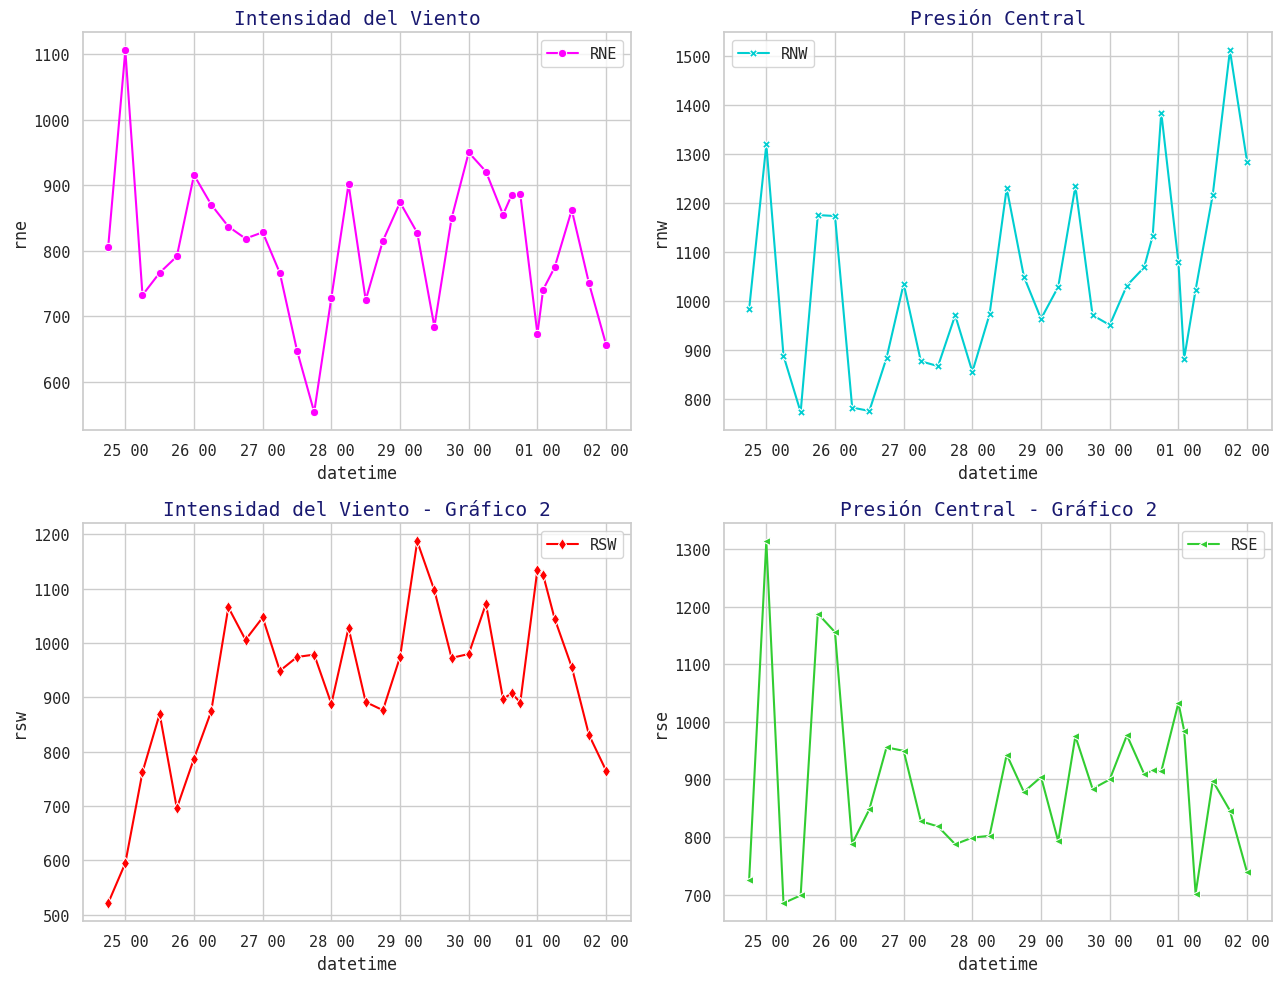

In [ ]:
sns.set_theme(style='whitegrid', font='monospace')
# Crear una figura con 2 filas y 2 columnas (2x2 subgráficas)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))

# Gráfico 1: Intensidad del Viento
sns.lineplot(data=df, x='datetime', y='rne', marker='o', color='magenta', ax=ax[0, 0])
ax[0, 0].set_title('Intensidad del Viento', color="midnightblue", fontsize=14)
ax[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
ax[0, 0].legend(['RNE'])

# Gráfico 2: Presión Central
sns.lineplot(data=df, x='datetime', y='rnw', marker='X', color='darkturquoise', ax=ax[0, 1])
ax[0, 1].set_title('Presión Central', color="midnightblue", fontsize=14)
ax[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
ax[0, 1].legend(['RNW'])

# Gráfico 3: Intensidad del Viento - Gráfico 2
sns.lineplot(data=df, x='datetime', y='rsw', marker='d', color='red', ax=ax[1, 0])
ax[1, 0].set_title('Intensidad del Viento - Gráfico 2', color="midnightblue", fontsize=14)
ax[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
ax[1, 0].legend(['RSW'])

# Gráfico 4: Presión Central - Gráfico 2
sns.lineplot(data=df, x='datetime', y='rse', marker='<', color='limegreen', ax=ax[1, 1])
ax[1, 1].set_title('Presión Central - Gráfico 2', color="midnightblue", fontsize=14)
ax[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
ax[1, 1].legend(['RSE'])

# Ajustar el espacio entre las subgráficas y mejorar la presentación
plt.tight_layout()
plt.show()

##**2.** Evaluación del SIAT-CT

Cálculo de la clasificación del ciclón tropical dentro del SIAT-CT:

*  Valor de la escala de intensidad.
*  Valor de la escala de circulación.
*  Valor de la peligrosidad

Velocidad (km/h)=Velocidad (kt)×1.852

1 km=0.54  millas náuticas (nmi)


In [ ]:
#Conversión de unidades nudos a km/h

df['mws_kmh'] = df['mws'] * 1.852
# Observar el cambio
print(df[['mws', 'mws_kmh']].head())

# Convertir la columna 'r34' de km a millas náuticas
df['r34_mi'] = df['r34'] * 0.54

# Verificar el resultado
print(df[['r34', 'r34_mi']].head())

     mws  mws_kmh
0  46.25   85.655
1  46.25   85.655
2  46.25   85.655
3  55.50  102.786
4  55.50  102.786
      r34   r34_mi
0 -9999.0 -5399.46
1 -9999.0 -5399.46
2 -9999.0 -5399.46
3 -9999.0 -5399.46
4 -9999.0 -5399.46


*   **Valor de la escala de Intensidad** (Velocidad del viento)

1. DT- Depresión Tropical - 62 km/h
2.  TT - Tormenta tropical - 63 - 117 km/h
3.  Huracán Categoría I - 118 - 153 Km/h
2.  Huracán Categoría II - 154 - 177 Km/h
3. Huracán Categoría III - 178 - 209 Km/h
4. Huracán Categoría IV - 210 - 249 Km/h
5.Huracán Categoría V - 249 + Km/h


In [ ]:
#Función para definir la escala de intensidad
def intensidad(mws_kmh):
    if mws_kmh < 63:
        return 0
    elif 63 <= mws_kmh <= 118:
        return 0
    elif 119 <= mws_kmh <= 153:
        return 1
    elif 154 <= mws_kmh <= 177:
        return 2
    elif 178 <= mws_kmh <= 208:
        return 3
    elif 209 <= mws_kmh <= 251:
        return 4
    else:
        return 5
#Observar el resultado, con columna de velocidad de vientos y agregando una para intensidad
df['Intensidad'] = df['mws_kmh'].apply(intensidad)
print(df[['mws_kmh', 'Intensidad']].head(32))

     mws_kmh  Intensidad
0    85.6550           0
1    85.6550           0
2    85.6550           0
3   102.7860           0
4   102.7860           0
5   102.7860           0
6   137.0480           1
7   137.0480           1
8   188.3484           3
9   188.3484           3
10  188.3484           3
11  154.1790           2
12  119.9170           1
13  137.0480           1
14  137.0480           1
15  171.3100           2
16  171.3100           2
17  188.3484           3
18  188.3484           3
19  205.5720           3
20  205.5720           3
21  222.6104           4
22  239.8340           4
23  256.8724           5
24  256.8724           5
25  274.0960           5
26  308.3580           5
27  325.3964           5
28  256.8724           5
29  205.5720           3
30  137.0480           1
31  102.7860           0


* **Valor de la escala de circulación.**

Se obtiene de: C = 0.0377 *R; donde R es el radio promedio (en millas náuticas) de los cuatro cuadrantes de la isotaca de 34 nudos (63 km/h). En caso de que C llegara a ser mayor que 5, solamente se le asignará el valor de 5.

In [ ]:
#Librería math para usar una función que trunca valores y devuelve números enteros
import math
#Función para definir la escala de circulación
def circulacion(r34_mi):
    c = math.trunc(0.0377 * abs(r34_mi))     #Se usa función de valor absoluto para que C se mantenga en el rango 0 a 5
    if c > 5:                                 #Si el valor de c es mayor a 5, se asigna 5
        return 5
    else:
        return c

#Observar el resultado, con columna de R34 y agregando una para valores de circulación
df['Circulación'] = df['r34_mi'].apply(circulacion)
print(df[['r34_mi', 'Circulación']].head(32))

     r34_mi  Circulación
0  -5399.46            5
1  -5399.46            5
2  -5399.46            5
3  -5399.46            5
4  -5399.46            5
5  -5399.46            5
6     45.36            1
7     45.63            1
8     83.16            3
9     83.43            3
10    84.51            3
11    61.83            2
12    29.97            1
13    48.06            1
14    48.33            1
15    76.95            2
16    77.49            2
17    89.10            3
18    90.45            3
19   101.52            3
20   102.60            3
21   110.70            4
22   117.72            4
23   124.47            4
24   125.55            4
25   130.95            4
26   137.97            5
27   140.13            5
28   125.55            4
29   103.68            3
30    52.65            1
31 -5399.46            5


* **Valor de la peligrosidad**
e= (I + C)/2

In [ ]:
#Función para el valor de peligrosidad
def peligrosidad(intensidad, circulacion):
    e = (intensidad + circulacion) / 2
    return math.trunc(e)   #Se trunca el valor de peligrosidad para obtener números enteros

# Para aplicar la función y realizar los cálculos entre las columnas 'Intensidad' y 'Circulación', se usa la función lambda
df['Peligrosidad'] = df.apply(lambda row: peligrosidad(row['Intensidad'], row['Circulación']), axis=1) #Axis para que se haga la operación para cada fila
#Para mostrar los tres valores calculados
print(df[['Intensidad', 'Circulación', 'Peligrosidad']].head(32))

#Para almacenar los valores de I, C y e
df.to_csv('alex_con_I_C_e.csv', index=False)  #No se incluyen los indices para que se muestren las columnas relevantes

    Intensidad  Circulación  Peligrosidad
0            0            5             2
1            0            5             2
2            0            5             2
3            0            5             2
4            0            5             2
5            0            5             2
6            1            1             1
7            1            1             1
8            3            3             3
9            3            3             3
10           3            3             3
11           2            2             2
12           1            1             1
13           1            1             1
14           1            1             1
15           2            2             2
16           2            2             2
17           3            3             3
18           3            3             3
19           3            3             3
20           3            3             3
21           4            4             4
22           4            4       

In [ ]:
 #Mostrar dataframe con nuevas columnas
 df= pd.read_csv('alex_con_I_C_e.csv')
 df

,datetime,lat,lon,mws,cpsl,r34,r5,rne,rnw,rsw,rse,rp,mws_kmh,r34_mi,Intensidad,Circulación,Peligrosidad
0,2010-06-24 18:00:00,15.9,-82.0,46.25,1007,-9999.0,639.5,805.22,983.47,521.18,725.81,758.9,85.6550,-5399.46,0,5,2
1,2010-06-25 00:00:00,16.0,-82.1,46.25,1006,-9999.0,640.5,1105.73,1319.65,594.94,1313.03,1083.3,85.6550,-5399.46,0,5,2
2,2010-06-25 06:00:00,16.1,-82.3,46.25,1006,-9999.0,641.0,732.55,888.67,762.36,685.23,767.2,85.6550,-5399.46,0,5,2
3,2010-06-25 12:00:00,16.2,-82.5,55.50,1005,-9999.0,683.5,766.59,773.32,869.44,698.78,777.0,102.7860,-5399.46,0,5,2
4,2010-06-25 18:00:00,16.4,-83.1,55.50,1005,-9999.0,685.0,791.56,1175.57,696.02,1187.78,962.7,102.7860,-5399.46,0,5,2
5,2010-06-26 00:00:00,16.6,-83.9,55.50,1004,-9999.0,686.5,915.64,1173.62,787.36,1155.50,1008.0,102.7860,-5399.46,0,5,2
6,2010-06-26 06:00:00,16.7,-84.9,74.00,1004,84.0,742.0,870.62,782.71,874.05,788.46,829.0,137.0480,45.36,1,1,1
7,2010-06-26 12:00:00,16.9,-86.1,74.00,1004,84.5,743.5,837.12,775.85,1065.62,848.04,881.7,137.0480,45.63,1,1,1
8,2010-06-26 18:00:00,17.2,-87.2,101.70,996,154.0,785.5,818.72,883.76,1005.71,955.63,916.0,188.3484,83.16,3,3,3
9,2010-06-27 00:00:00,17.5,-88.2,101.70,995,154.5,788.0,828.32,1035.44,1046.97,949.56,965.1,188.3484,83.43,3,3,3


#**3.** Análisis adicional del ciclón
* Clasificación dentro de la escala Saffir-Simpson.
* Etiqueta de tamaño del ciclón (Grande, Promedio, Pequeño) en función del radio promedio de precipitación y el uso de cuartiles.
* Generación de un archivo con las 5 nuevas columnas adicionales.

**Clasificación dentro de la escala Saffir-Simpson** (categorías 1-5)

La escala Saffir-Simpson (Vientos sostenidos):

1.  DT- Depresión Tropical < 63 km/h
2. TT - Tormenta tropical - 64 - 118 km/h
3. Huracán Categoría I - 119 - 153 Km/h
4. Huracán Categoría II - 154 - 177 Km/h
5. Huracán Categoría III - 178 - 208 Km/h
6. Huracán Categoría IV - 209 - 251 Km/h
7. Huracán Categoría V   > 252 Km/h




In [ ]:
#Función para definir la escala de Saffir-Simpson
def saffir_simpson(mws_kmh):
    if mws_kmh < 63:
        return 'DT'
    elif 63 <= mws_kmh <= 118:
        return 'TT'
    elif 119 <= mws_kmh <= 153:
        return 'Huracán Categoría I'
    elif 154 <= mws_kmh <= 177:
        return 'Huracán Categoría II'
    elif 178 <= mws_kmh <= 208:
        return 'Huracán Categoría III'
    elif 209 <= mws_kmh <= 251:
        return 'Huracán Categoría IV'
    else:
        return 'Huracán Categoría V'
#Observar el resultado, con columna de velocidad de vientos y agregando una para Saffir-Simpson
df['Saffir-Simpson'] = df['mws_kmh'].apply(saffir_simpson)
print(df[['mws_kmh', 'Saffir-Simpson']].head(32))

     mws_kmh         Saffir-Simpson
0    85.6550                     TT
1    85.6550                     TT
2    85.6550                     TT
3   102.7860                     TT
4   102.7860                     TT
5   102.7860                     TT
6   137.0480    Huracán Categoría I
7   137.0480    Huracán Categoría I
8   188.3484  Huracán Categoría III
9   188.3484  Huracán Categoría III
10  188.3484  Huracán Categoría III
11  154.1790   Huracán Categoría II
12  119.9170    Huracán Categoría I
13  137.0480    Huracán Categoría I
14  137.0480    Huracán Categoría I
15  171.3100   Huracán Categoría II
16  171.3100   Huracán Categoría II
17  188.3484  Huracán Categoría III
18  188.3484  Huracán Categoría III
19  205.5720  Huracán Categoría III
20  205.5720  Huracán Categoría III
21  222.6104   Huracán Categoría IV
22  239.8340   Huracán Categoría IV
23  256.8724    Huracán Categoría V
24  256.8724    Huracán Categoría V
25  274.0960    Huracán Categoría V
26  308.3580    Huracán Cate

* **Etiqueta de tamaño del ciclón (Grande, Promedio, Pequeño)** en función del radio promedio de precipitación y el uso de cuartiles.

In [ ]:
# Calcular cuartiles de la columna ’rp ’
Q1 = df ['rp']. quantile (0.25) # Valor mayor que el 25% de los valores de la distribución
Q2 = df ['rp']. quantile (0.50) # Mediana
Q3 = df ['rp']. quantile (0.75)  # Valor que sobrepasa el 25% de los valores de la distribución

def tamano_ciclon(rp):
    if rp < Q1:
        return 'Pequeño'
    elif Q1 <= rp <= Q3:
        return 'Promedio'
    else:
        return 'Grande'

#Observar el resultado, con columna de etiquetas para el tamaño del ciclón
df['Tamaño del ciclón'] = df['rp'].apply(tamano_ciclon)
print(df[['rp', 'Tamaño del ciclón']].head(32))

        rp Tamaño del ciclón
0    758.9           Pequeño
1   1083.3            Grande
2    767.2           Pequeño
3    777.0           Pequeño
4    962.7          Promedio
5   1008.0            Grande
6    829.0           Pequeño
7    881.7          Promedio
8    916.0          Promedio
9    965.1          Promedio
10   854.9           Pequeño
11   826.9           Pequeño
12   822.8           Pequeño
13   817.8           Pequeño
14   926.1          Promedio
15   947.5          Promedio
16   904.9          Promedio
17   929.1          Promedio
18   959.1          Promedio
19   997.6            Grande
20   919.3          Promedio
21   945.2          Promedio
22  1000.3            Grande
23   932.6          Promedio
24   960.4          Promedio
25  1019.0            Grande
26   980.0            Grande
27   933.3          Promedio
28   886.1          Promedio
29   983.2            Grande
30   984.9            Grande
31   861.2          Promedio


In [ ]:
#Para almacenar la clasificación en el dataframe
df.to_csv('alex_clasific.saffir_tam', index=False)
df= pd.read_csv('alex_clasific.saffir_tam')
#Se muestra el dataframe con las 5 nuevas columnas adicionales
df[['datetime','lat','lon','mws','cpsl','r34','r5','rne','rnw','rsw','rse','rp','Intensidad','Circulación','Peligrosidad','Saffir-Simpson','Tamaño del ciclón']].head(32)


,datetime,lat,lon,mws,cpsl,r34,r5,rne,rnw,rsw,rse,rp,Intensidad,Circulación,Peligrosidad,Saffir-Simpson,Tamaño del ciclón
0,2010-06-24 18:00:00,15.9,-82.0,46.25,1007,-9999.0,639.5,805.22,983.47,521.18,725.81,758.9,0,5,2,TT,Pequeño
1,2010-06-25 00:00:00,16.0,-82.1,46.25,1006,-9999.0,640.5,1105.73,1319.65,594.94,1313.03,1083.3,0,5,2,TT,Grande
2,2010-06-25 06:00:00,16.1,-82.3,46.25,1006,-9999.0,641.0,732.55,888.67,762.36,685.23,767.2,0,5,2,TT,Pequeño
3,2010-06-25 12:00:00,16.2,-82.5,55.50,1005,-9999.0,683.5,766.59,773.32,869.44,698.78,777.0,0,5,2,TT,Pequeño
4,2010-06-25 18:00:00,16.4,-83.1,55.50,1005,-9999.0,685.0,791.56,1175.57,696.02,1187.78,962.7,0,5,2,TT,Promedio
5,2010-06-26 00:00:00,16.6,-83.9,55.50,1004,-9999.0,686.5,915.64,1173.62,787.36,1155.50,1008.0,0,5,2,TT,Grande
6,2010-06-26 06:00:00,16.7,-84.9,74.00,1004,84.0,742.0,870.62,782.71,874.05,788.46,829.0,1,1,1,Huracán Categoría I,Pequeño
7,2010-06-26 12:00:00,16.9,-86.1,74.00,1004,84.5,743.5,837.12,775.85,1065.62,848.04,881.7,1,1,1,Huracán Categoría I,Promedio
8,2010-06-26 18:00:00,17.2,-87.2,101.70,996,154.0,785.5,818.72,883.76,1005.71,955.63,916.0,3,3,3,Huracán Categoría III,Promedio
9,2010-06-27 00:00:00,17.5,-88.2,101.70,995,154.5,788.0,828.32,1035.44,1046.97,949.56,965.1,3,3,3,Huracán Categoría III,Promedio


In [ ]:
# Crear un nued¿vo dataframe donde solo se muestren las columnas que se necesitan
alexdat_columns = ['datetime','lat','lon','mws','cpsl','r34','r5','rne','rnw','rsw','rse','rp','Intensidad','Circulación','Peligrosidad','Saffir-Simpson','Tamaño del ciclón']
new_df = df[alexdat_columns]

# #Para guardar el nuevo DataFrame en un archivo csv
new_df.to_csv('alex_clasific_seleccionado.csv', index=False)

## **Ejercicio 4**  
Creación de funciones anidadas que calculen la calificación de peligro del ciclón tropical del SIAT-CT para futuros ejemplos.

In [ ]:
#Función anidada para Intensidad (I)
import math

def escala_intensidad(categoria):
    if categoria == 'Depresión tropical':
        return 0
    elif categoria =='Tormenta tropical':
        return 0
    elif categoria =='Huracán Categoría I':
        return 1
    elif categoria =='Huracán Categoría II':
         return 2
    elif categoria =='Huracán Categoría III':
        return 3
    elif categoria =='Huracán Categoría IV':
        return 4
    else:
        return 5

#Función anidada para Circulación (C)
def escala_circulacion(r34_mi):
    c = math.trunc(0.0377 * abs(r34_mi))
    return min(c, 5)

#Peligrosidad (e)
def calculo_peligro(categoria,r34_mi):
    I = escala_intensidad(categoria)
    C = escala_circulacion(r34_mi)
    e = math.trunc((I + C) / 2)

    return e

print(calculo_peligro('Huracán Categoría I', 50))

1


In [ ]:
import math     #lo mismo  que arriba pero por si hay que introducir datos

# Función anidada para Intensidad (I)
def escala_intensidad(categoria):
    if categoria == 'Depresión tropical':
        return 0
    elif categoria == 'Tormenta tropical':
        return 0
    elif categoria == 'Huracán Categoría I':
        return 1
    elif categoria == 'Huracán Categoría II':
        return 2
    elif categoria == 'Huracán Categoría III':
        return 3
    elif categoria == 'Huracán Categoría IV':
        return 4
    elif categoria == 'Huracán Categoría V':
        return 5
    else:
        return -1  # Para un valor de categoría inválido

# Función anidada para Circulación (C)
def escala_circulacion(r34_mi):
    c = math.trunc(0.0377 * abs(r34_mi))
    return min(c, 5)

# Peligrosidad (e)
def calculo_peligro(categoria, r34_mi):
    I = escala_intensidad(categoria)
    if I == -1:
        return "Categoría no válida"
    C = escala_circulacion(r34_mi)
    e = math.trunc((I + C) / 2)

    return e

# Solicitar al usuario los datos
cat = input("Ingrese la Categoria: ")
try:
    radio = float(input("Ingrese el valor del radio de 34 nudos en millas: "))
except ValueError:
    print("El valor del radio de 34 nudos debe ser un número.")

# Calcular el peligro
peligro = calculo_peligro(cat, radio)
print("El nivel de peligrosidad es:", peligro)

Ingrese la Categoria: Huracán Categoría V
Ingrese el valor del radio de 34 nudos en millas: 34
El nivel de peligrosidad es: 3
